# This Notebook corresponds to the second exersice at the first TP.

Exercise: Data Cleaning and Preparation

Objective: Handling missing and inconsistent data

Task:
Donwload [Iris dataset](https://www.kaggle.com/datasets/bharathkumarkathula/iris-with-missing-data) and put it  inside dataset folder in your project folder.

Library importation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading dataset:

In [2]:
dataset= "./../dataset/Iris_missingdata.csv"
data = pd.read_csv(dataset)

Display columns:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  139 non-null    float64
 2   SepalWidthCm   143 non-null    float64
 3   PetalLengthCm  142 non-null    float64
 4   PetalWidthCm   141 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Display head dataset:

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check for missing values:

In [5]:
data.isnull().sum()

Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64

Visualise missing data using a heatmap:

<Axes: >

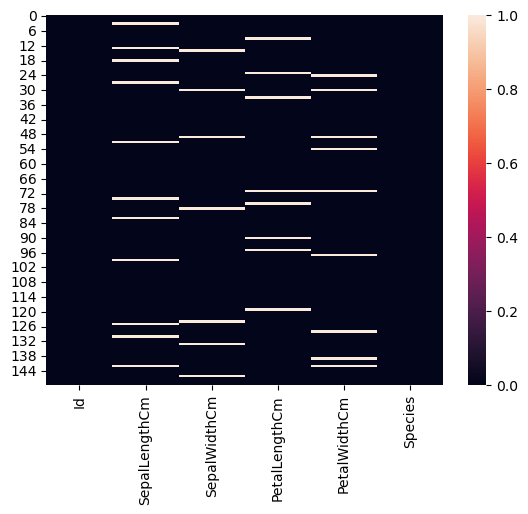

In [7]:
sns.heatmap(data.isna())